In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [10]:
data = pd.read_csv(r'../datas/clean_car.csv')

In [11]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,Silver,5
17064,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8
17065,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4
17066,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,Black,4


## متوسط بيع شركة همر اعلي شركة

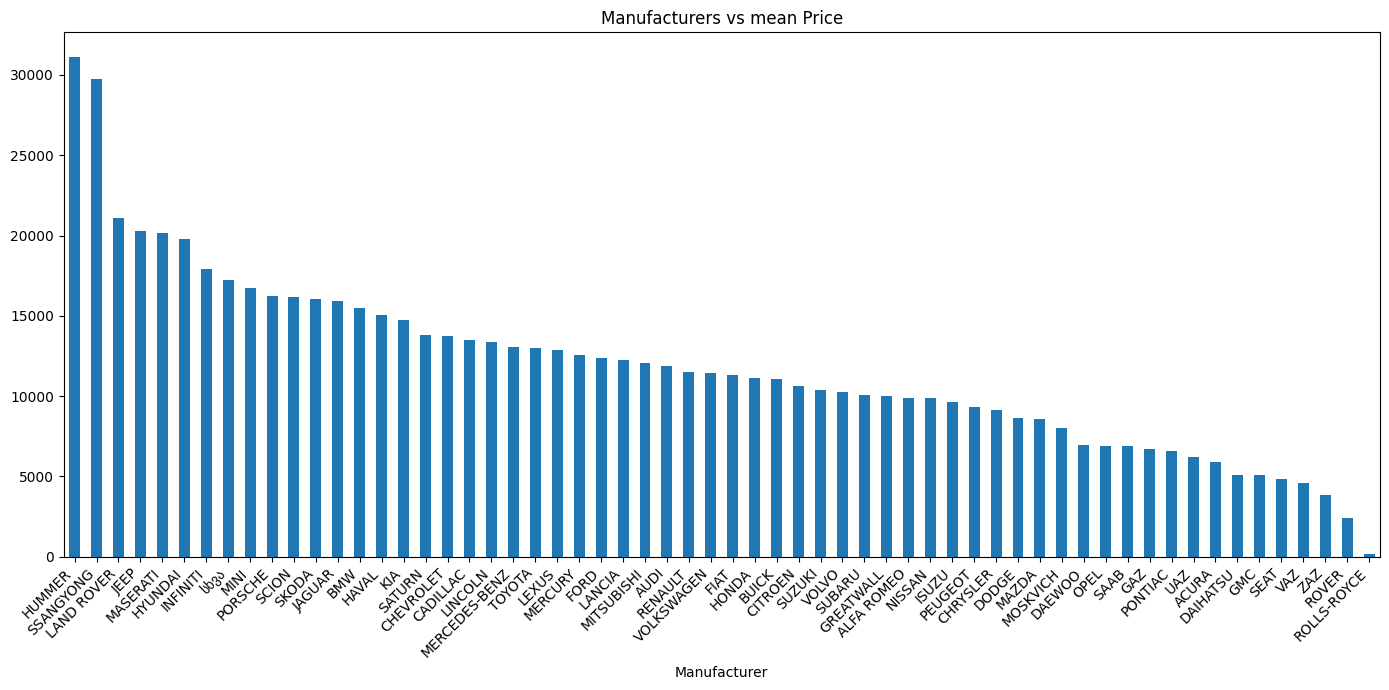

In [12]:
plt.figure(figsize=(14,7))


mean_price = data.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
mean_price.plot(kind='bar')

plt.xticks(rotation=45, ha='right')   # لفّ الأسماء 45 درجة
plt.title("Manufacturers vs mean Price")
plt.tight_layout()
plt.show()


## اكثر شركة ادخالا للفلوس شركة هونداي

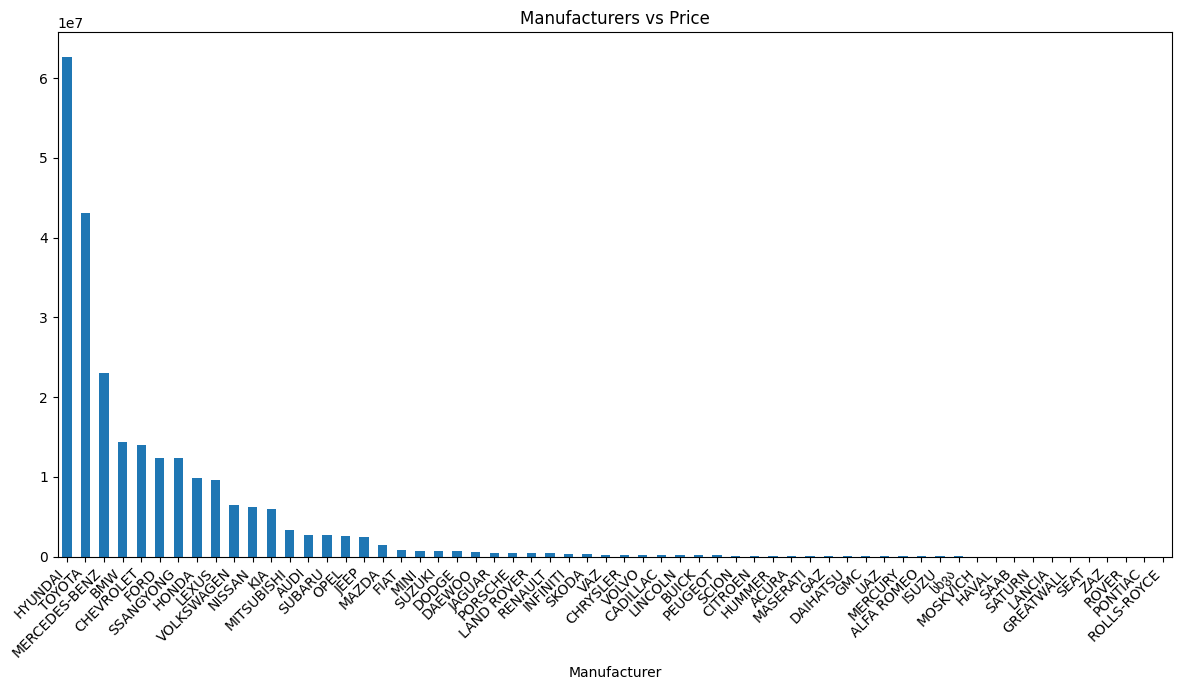

In [13]:
plt.figure(figsize=(12,7))

Manufacturer_vs_price = data.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False)

Manufacturer_vs_price.plot(kind='bar' )

plt.xticks(rotation=45, ha='right')   # لفّ الأسماء 45 درجة
plt.title("Manufacturers vs Price")
plt.tight_layout()
plt.show()

In [14]:
filter_manufacturer_by_price = data.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False).reset_index().iloc[36:]['Manufacturer'].values

## اكثر شركة ظهورا هي تيوتا وبعدها هونداي
## اكثر شركة مبيعا هي هونداي وبعدها تيوتا

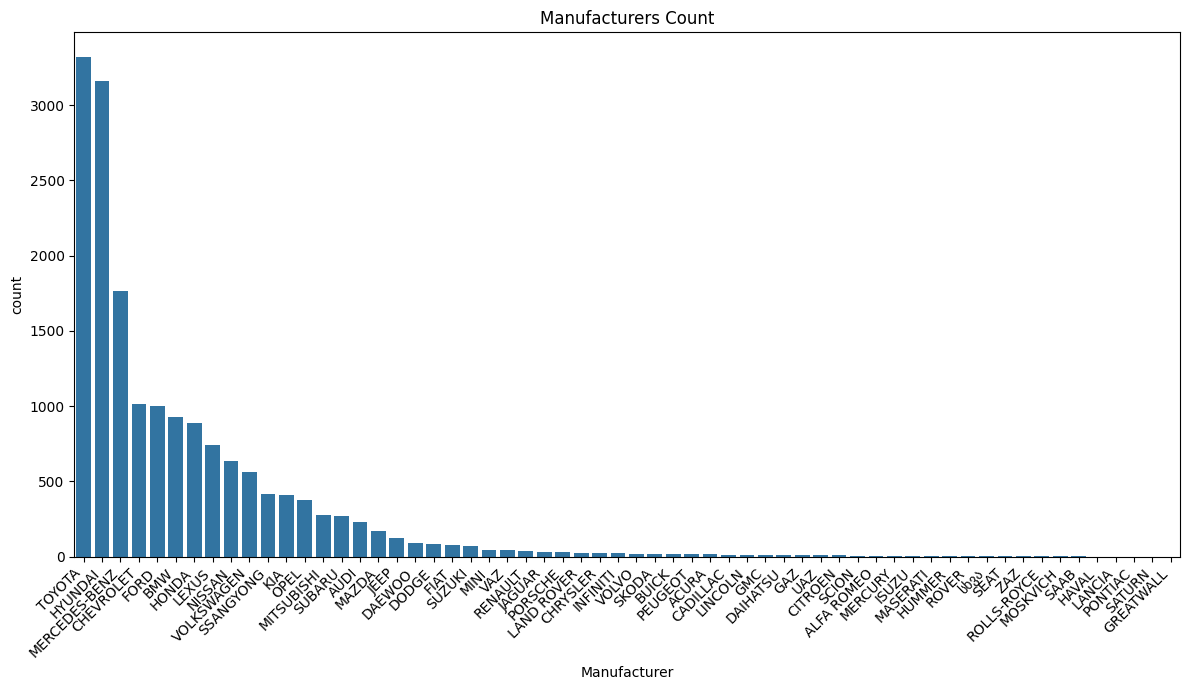

In [15]:
plt.figure(figsize=(12,7))

sns.countplot(
    data=data,
    x=data['Manufacturer'],
    order=data['Manufacturer'].value_counts().index
)

plt.xticks(rotation=45, ha='right')   # لفّ الأسماء 45 درجة
plt.title("Manufacturers Count")
plt.tight_layout()
plt.show()

In [16]:
comparison = pd.DataFrame({
    'Count': data['Manufacturer'].value_counts(),
    'Mean Price': data.groupby('Manufacturer')['Price'].mean(),
    'Total Revenue': data.groupby('Manufacturer')['Price'].sum()
}).sort_values(by='Total Revenue', ascending=False)

comparison.head(10)

,Count,Mean Price,Total Revenue
Manufacturer,,,
HYUNDAI,3162,19803.281467,62617976
TOYOTA,3317,13002.070847,43127869
MERCEDES-BENZ,1767,13057.438031,23072493
BMW,926,15514.371490,14366308
CHEVROLET,1015,13758.159606,13964532
FORD,1002,12370.745509,12395487
SSANGYONG,416,29720.377404,12363677
HONDA,886,11111.012415,9844357
LEXUS,744,12853.755376,9563194


In [17]:
filter_manufacturer_by_price = data.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False).reset_index().iloc[36:]['Manufacturer'].values
filter_manufacturer_by_count = data['Manufacturer'].value_counts().reset_index().iloc[31:]['Manufacturer'].values

In [18]:
union_uninterseted = [i for i in filter_manufacturer_by_count if i for x in filter_manufacturer_by_price if i == x]
union_uninterseted

['ACURA',
 'GMC',
 'DAIHATSU',
 'GAZ',
 'UAZ',
 'CITROEN',
 'SCION',
 'ALFA ROMEO',
 'MERCURY',
 'ISUZU',
 'MASERATI',
 'HUMMER',
 'ROVER',
 'სხვა',
 'SEAT',
 'ZAZ',
 'ROLLS-ROYCE',
 'MOSKVICH',
 'SAAB',
 'HAVAL',
 'LANCIA',
 'PONTIAC',
 'SATURN',
 'GREATWALL']

In [19]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [20]:
data['Prod. year'].value_counts().sort_index(ascending=False)

Prod. year
2020      22
2019     223
2018     338
2017     773
2016    1181
2015    1256
2014    1887
2013    1818
2012    2009
2011    1528
2010    1377
2009     571
2008     648
2007     437
2006     302
2005     376
2004     325
2003     344
2002     277
2001     236
2000     269
1999     190
1998     194
1997     133
1996      98
1995      87
1994      38
1993      20
1992      28
1991       8
1990      17
1989       5
1988      11
1987       5
1986       6
1985       3
1984       5
1983       3
1982       1
1981       1
1980       2
1978       1
1977       2
1976       1
1974       1
1973       1
1964       2
1957       1
1953       3
1947       1
1939       3
Name: count, dtype: int64

In [21]:
df = data[(data['Prod. year'] > 1991) & (data['Prod. year'] <2020)]

In [22]:
df = df[~(df['Manufacturer'].isin(union_uninterseted))]

In [ ]:
# df.to_csv("clean_car_filtering.csv", index=False)

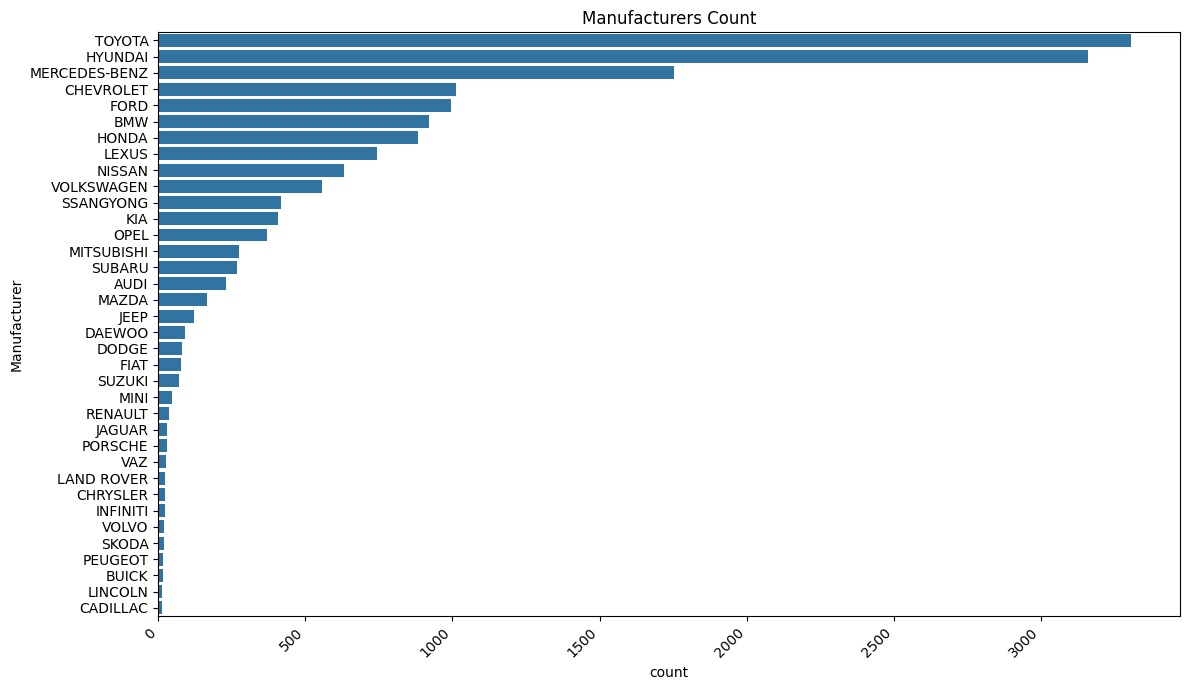

In [23]:
plt.figure(figsize=(12,7))

sns.countplot(
    data=df,
    y=df['Manufacturer'],
    order=df['Manufacturer'].value_counts().index
)

plt.xticks(rotation=45, ha='right')   # لفّ الأسماء 45 درجة
plt.title("Manufacturers Count")
plt.tight_layout()
plt.show()

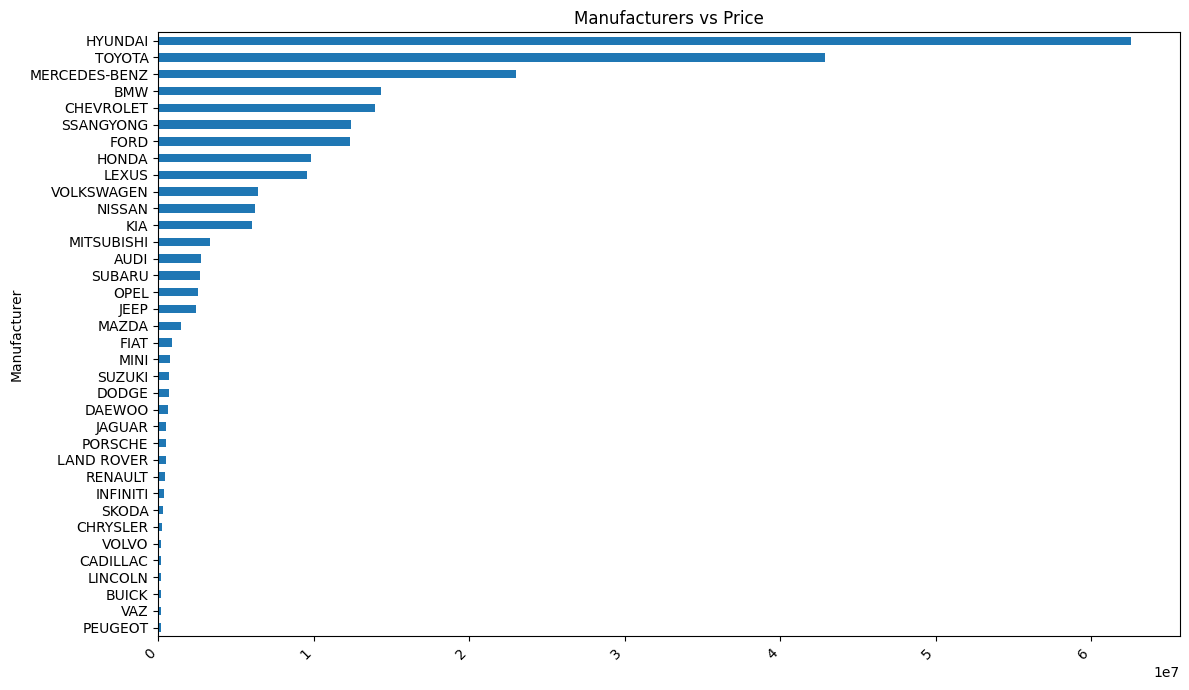

In [24]:
plt.figure(figsize=(12,7))

Manufacturer_vs_price = df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=True)

Manufacturer_vs_price.plot(kind='barh' )

plt.xticks(rotation=45, ha='right')   # لفّ الأسماء 45 درجة
plt.title("Manufacturers vs Price")
plt.tight_layout()
plt.show()

In [25]:
top_10_price = df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False).head(10).index
top_10_count = df['Manufacturer'].value_counts().head(10).index

union_top_9 = [i for i in top_10_price if i for x in top_10_count if i==x]
union_top_9

['HYUNDAI',
 'TOYOTA',
 'MERCEDES-BENZ',
 'BMW',
 'CHEVROLET',
 'FORD',
 'HONDA',
 'LEXUS',
 'VOLKSWAGEN']

In [34]:
df[df['Manufacturer'] == 'HYUNDAI']['Model'].head(10).values

array(['Santa FE', 'Sonata', 'Elantra', 'Elantra', 'Elantra', 'Elantra',
       'Santa FE', 'Elantra', 'H1', 'Sonata'], dtype=object)

In [ ]:
df[df['Model'].isin(df[df['Manufacturer'] == 'HYUNDAI']['Model'].head(10).values)]['Model']

array(['Santa FE', 'Sonata', 'Elantra', 'H1'], dtype=object)

In [38]:
ttt = df[
        (df['Manufacturer'] == 'HYUNDAI') &
        (df['Prod. year'].between(2010, 2019))
    ]


ttt['Model'].value_counts().sort_values(ascending=False).reset_index()


,Model,count
0,Elantra,865
1,Sonata,751
2,H1,375
3,Tucson,374
4,Santa FE,353
...,...,...
61,i40,1
62,Sonata SE,1
63,Veracruz,1
64,Sonata სასწრაფოდ,1


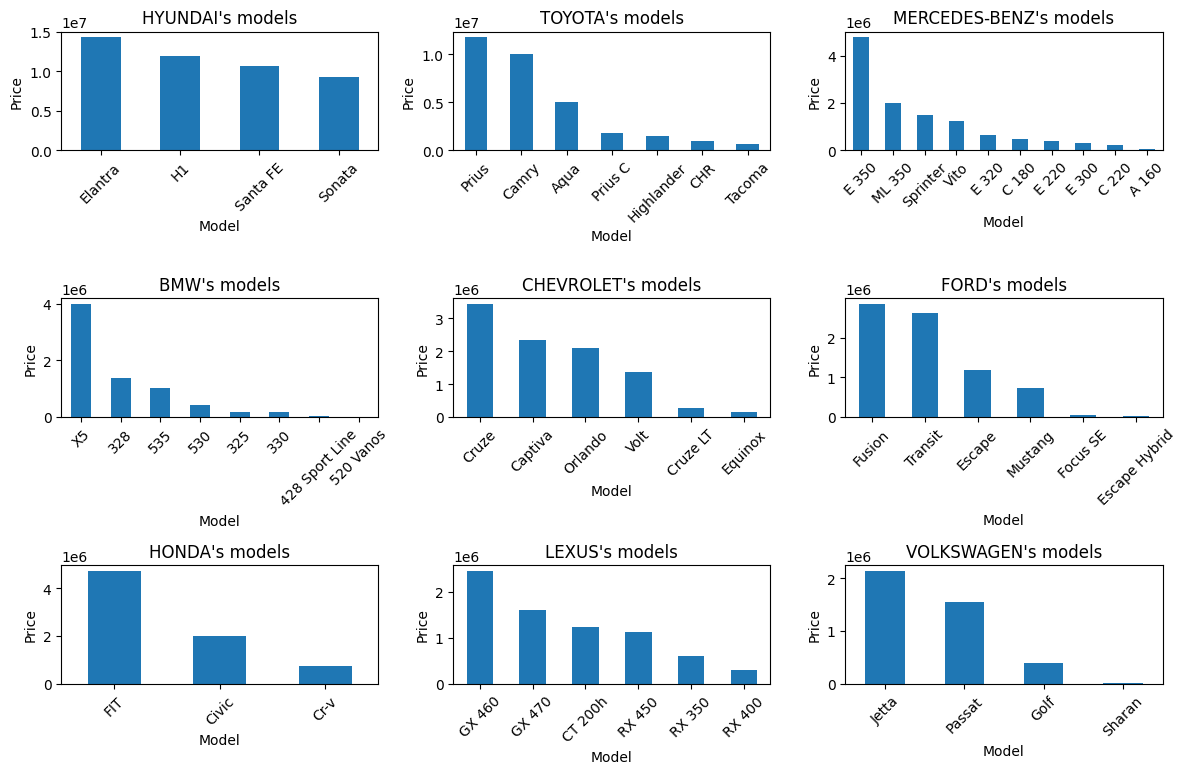

In [26]:
import math


cols = 3
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.reshape(-1)

for ax, manufacturer in zip(axes, union_top_9):

    model_top_10 = df[df['Manufacturer'] == manufacturer]['Model'].head(10).values
    
    df_filter = df[df['Model'].isin(model_top_10)]
    
    df_filter = (
        df_filter
        .groupby('Model')['Price']
        .sum()
        .sort_values(ascending=False)  
    )

    df_filter.plot(kind='bar', ax=ax)

    ax.set_title(f"{manufacturer}'s models")
    ax.set_ylabel("Price")
    ax.tick_params(axis='x', rotation=45)

# يمسح أي subplot فاضي
for i in range(len(union_top_9), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


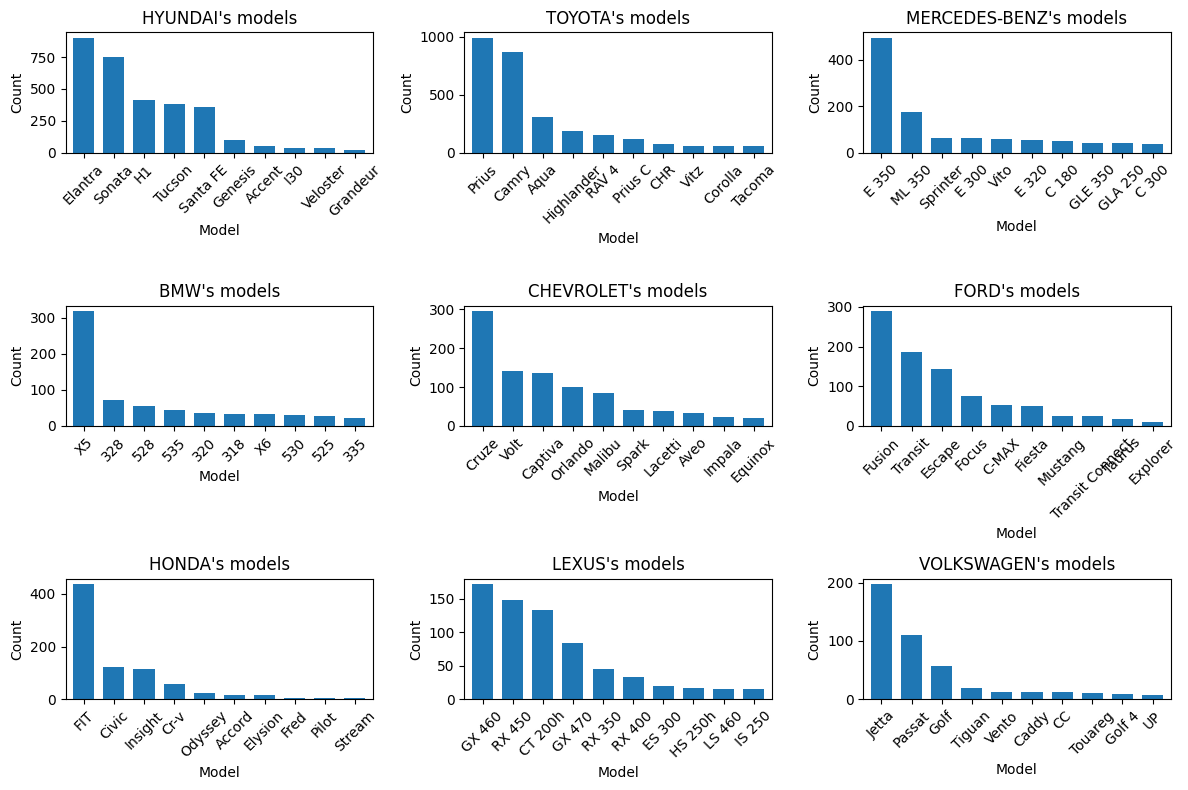

In [40]:
import math


cols = 3
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.reshape(-1)

for ax, manufacturer in zip(axes, union_top_9):

    model_top_10 = df[df['Manufacturer'] == manufacturer]
    
    df_filter = model_top_10['Model'].value_counts().sort_values(ascending=False).head(10)
    
    

    df_filter.plot(kind='bar', ax=ax, width=0.7)

    ax.set_title(f"{manufacturer}'s models")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

# يمسح أي subplot فاضي
for i in range(len(union_top_9), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [32]:
dd = pd.read_csv(r'../datas/clean_car_filtering.csv')
dd.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


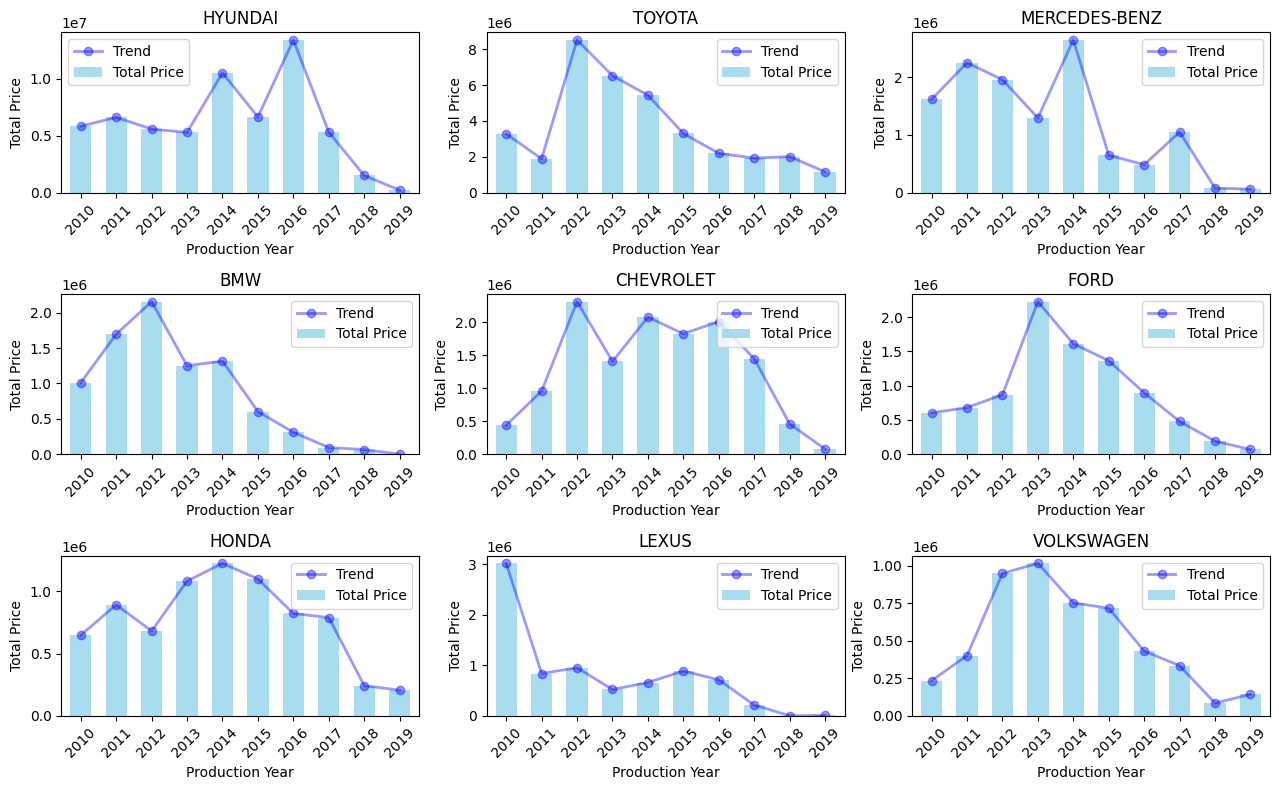

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(13, 8))
axes = axes.reshape(-1)

years = list(range(2010, 2020))  # سنوات ثابتة

for ax, manufacturer in zip(axes, union_top_9):

    df_filter = df[
        (df['Manufacturer'] == manufacturer) &
        (df['Prod. year'] >= 2010) &
        (df['Prod. year'] <= 2019)
    ].groupby('Prod. year')['Price'].sum()

    # رسم bar
    bars = df_filter.plot(kind='bar', ax=ax, color='skyblue', width=0.6, alpha=0.7, label='Total Price')

    # رسم line على نفس الـ positions
    ax.plot(range(len(df_filter)), df_filter.values, color='blue', alpha=0.4, marker='o', linewidth=2, label='Trend')

    ax.set_title(f"{manufacturer}")
    ax.set_ylabel("Total Price")
    ax.set_xlabel("Production Year")
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years, rotation=45)
    ax.legend()

# يمسح أي subplot فاضي
for i in range(len(union_top_9), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


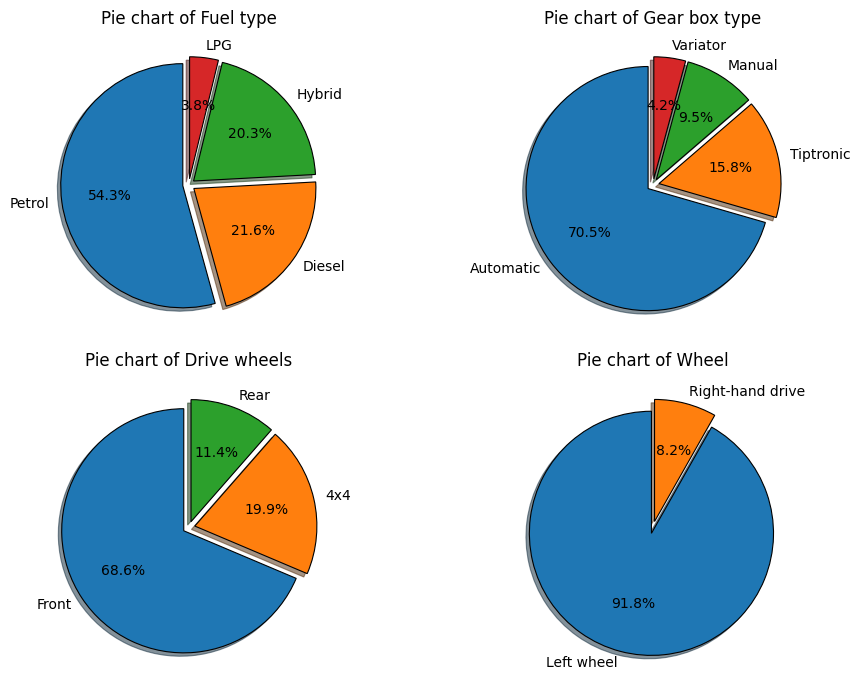

In [29]:

bie_char_list = ['Fuel type','Gear box type','Drive wheels','Wheel']

fig,axes = plt.subplots(2,2,figsize= (10,7))
axes = axes.reshape(-1)

for ax , col in zip(axes , bie_char_list):

    counts = df[col].value_counts().head(4)  # أكبر 4 قيم
    
    ax.pie(
        counts, 
        labels=counts.index,           # اسم كل قطاع
        autopct='%1.1f%%',            # يظهر النسبة لكل قطاع
        startangle=90,                 # يبدأ الرسم من زاوية 90
        explode=[0.05]*len(counts),    # يبعد كل قطاع شويه عن المركز
        shadow=True,                   # يضيف ظل تحت الرسم
        wedgeprops={'edgecolor':'black','linewidth':.8}  # حدود سوداء لكل قطاع
    )
    
    ax.set_title(f"Pie chart of {col}")
plt.tight_layout()
plt.show()
